<a href="https://colab.research.google.com/github/Masoud0389/FDI-Attack-Detection/blob/main/FDI_Detection_n_IF_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pwd

In [3]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_FDI8_n.csv')

In [4]:
X = dataset.iloc[:, :]

In [ ]:
#print(X)

# Feature Scaling

In [120]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#maxabs_scaler = MaxAbsScaler()
#X_scaled = maxabs_scaler.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled, norm='l1')
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Feature Selection/Reduction

In [121]:
from sklearn.decomposition import PCA
#from sklearn.feature_selection import VarianceThreshold
#Y = VarianceThreshold(threshold=(.0010 * (1 - .0010)))
#X = Y.fit_transform(X)
#print(X)
print(np.shape(X_normalized))
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns=['PC1','PC2']
#cdict = {0: 'red', 1: 'blue'}
#X_principal.columns = ['P1', 'P2']


(1200019, 34)


In [115]:
#np. set_printoptions(threshold=np. inf)
print(X_principal)
print(type(X_principal))
#print(X_principal.head())
#print(np.shape(X_principal))

                0         1
0        1.006060  5.548643
1        1.006060  5.548643
2        1.006060  5.548643
3        1.006060  5.548643
4        1.006060  5.548643
...           ...       ...
1200014 -0.503470 -0.009083
1200015 -0.503472 -0.009102
1200016 -0.503473 -0.009118
1200017 -0.503473 -0.009120
1200018 -0.503473 -0.009120

[1200019 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


# Plot Test

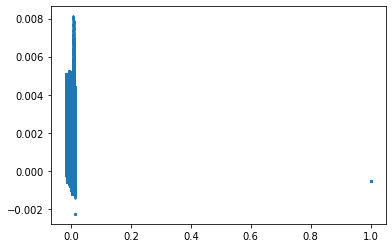

In [122]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s = 1 , alpha=1)

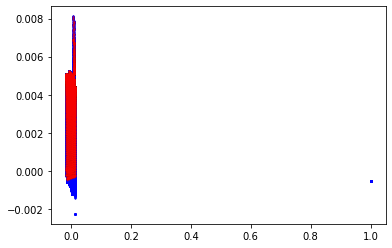

In [123]:

#print(X_principal.iloc[:,0])
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
for i in range(0,20,1):
  plt.scatter(X_principal.iloc[8000 + 60001*i:11000+ 60001*i,0], X_principal.iloc[8000+ 60001*i:11000+ 60001*i,1],c = 'r', s = 1 , alpha=0.1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()

# Anomaly Detection

In [ ]:
#from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
#label = DBSCAN(eps = 0.001, min_samples = 10, algorithm='ball_tree', metric='haversine').fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [124]:
from sklearn.ensemble import IsolationForest
label = IsolationForest(n_estimators= 100, contamination=3/60).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 500).fit_predict(X_principal)

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

In [125]:
index = np.where(label==-1)
index = np.array(index)
#print(index[0])
c = 0
for l in range(0,20,1):
  for i in index[0]:
    if i >= 8000+60001*l and i <= 11000+60001*l:
      c = c + 1
    #print(i)
print(c)
print((c/60000)*100)
#label = pd.DataFrame(label, columns = ['Column_A'])
#label.to_csv("lof_test1.csv")

50442
84.07


# Visualization

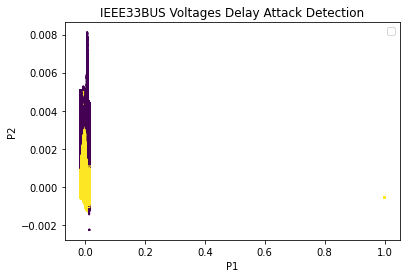

In [126]:
#plt.scatter(X_principal.loc[label == -1, 0], X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(X_principal.loc[label == 1, 0], X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = label, s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

In [127]:
index = np.where(label == -1)
index1 = np.where(label!=-1)
index = tuple((i)/1000 for i in index)
index1 = tuple((i)/1000 for i in index1)

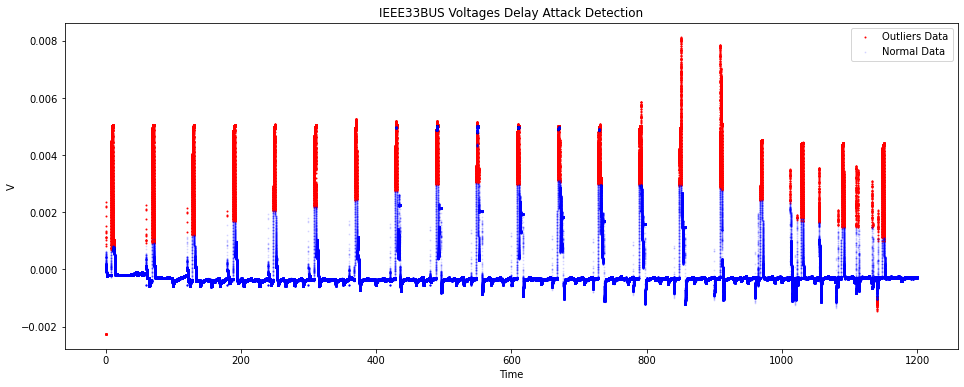

In [128]:
fig = plt.figure() 
fig.set_size_inches(16, 6)
plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data', alpha = 1)
plt.scatter(index1, X_principal.loc[label != -1, 1], s = 1, c = 'blue', label = 'Normal Data', alpha = 0.1)
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#for i in range(0,20,1):
#  plt.scatter()], X_principal.iloc[8000+ 60001*i:11000+ 60001*i,1],c = 'r', s = 1 , alpha=0.1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('Time')
plt.ylabel('V')
plt.legend()
plt.show() 

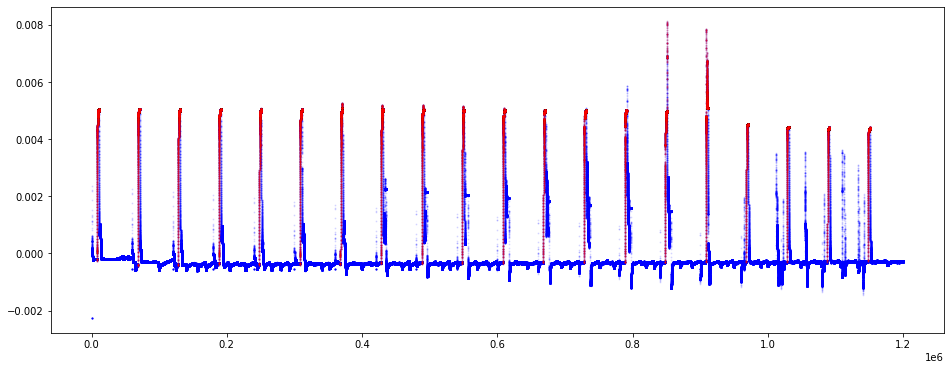

In [149]:
fig = plt.figure() 
fig.set_size_inches(16, 6)
index2 = np.arange(0, 1200019, 1).tolist()
index2 = tuple(index2)
index4 = []
#for i in range(0,20,1):
#  index3 = np.arange(8000 + 60001*i, 11000+60001*i, 1)
#  index4 = np.append(index4, index3)
#index4 = tuple(index4)
#print(np.shape(index4))
#print(X_principal.iloc[8000+ 60001:11000+ 60001,1])
plt.scatter(index2, X_principal.iloc[:,1],c = 'b', s = 1 , alpha=0.1)
for i in range(0,20,1):
  index3 = np.arange(8000 + 60001*i, 11000+60001*i, 1)
  index4 = tuple(index3)
  plt.scatter(index3, X_principal.iloc[8000+ 60001*i:11000+ 60001*i,1],c = 'r', s = 1 , alpha=0.1)
plt.show()
